Q5
répartition socio-professionnelle des candidat.e.s cette requête permet de s'intéresser au profil sociaux professionnel des candidat.e.s et une contrainte temporelle peut rentrer en ligne de compte. besoin :

table personne
>nom/prénom
ID
genre

table participation
>fk_personne
fk_evenement

table événement
>événement

table travaille
>fk_personne
fk_metier

table métier
>métier
fk_type_M

table type métier
>type métier

In [2]:
import sqlite3
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()


# 5. répartition socio-professionnelle des candidat.e.s 

In [5]:

df_metiers_elections = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition as metier FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.definition ='legislatif' AND tm.pk_type_M is not null
group by metier
ORDER BY count_type_metier DESC
""", connection)

total= df_metiers_elections['count_type_metier'].sum()

df_metiers_elections['pourcentage']= df_metiers_elections['count_type_metier']/ total * 100.00

df_metiers_elections.head(1000)

,count_type_metier,metier,pourcentage
0,172,usine_batiment,35.758836
1,84,education,17.463617
2,57,domestique,11.850312
3,32,artisanat_vente,6.652807
4,31,service_publique,6.444906
5,24,impression_journalisme,4.989605
6,22,employe_bureau,4.573805
7,19,santé_social,3.950104
8,15,restauration_hotellerie,3.118503
9,10,droit_finance,2.079002


### répartitions des métiers dans un graphe

In [24]:
df_copy_metiers_elections = df_metiers_elections.drop(columns=['count_type_metier'])

df_copy_metiers_elections.head()

df_copy_metiers_elections.to_csv('CSV/question_05_metiers_elections.csv')

C:\Users\LZender\AppData\Local\Temp\ipykernel_9316\3765610866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_copy_metiers_elections, x='metier', y='pourcentage', palette='pastel')


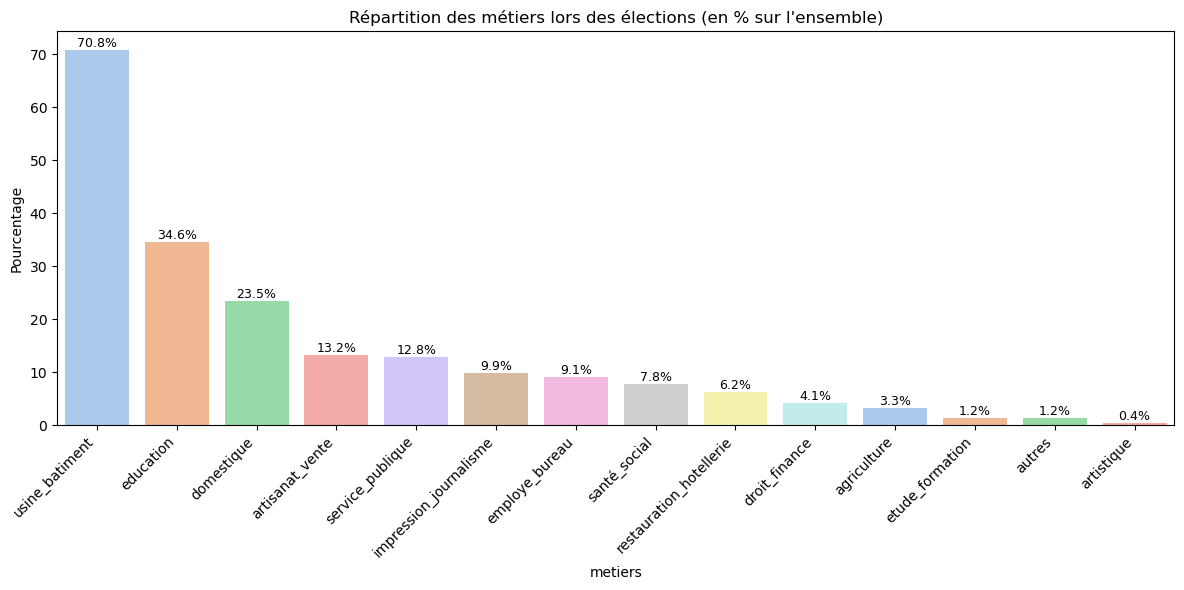

In [25]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df_copy_metiers_elections, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers lors des élections (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("metiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metiers_elections_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 5.1 répartition socio-professionnelle selon le genre

#### métiers chez les candidatEs

In [4]:
df_metiers_elections_F = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition as metier FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.definition ='legislatif' AND tm.pk_type_M is not null AND pe.genre='F'
group by metier
ORDER BY count_type_metier DESC
""", connection)

total= df_metiers_elections_F['count_type_metier'].sum()

df_metiers_elections_F['pourcentage']= df_metiers_elections_F['count_type_metier']/ total * 100.00

df_metiers_elections_F.head(1000)

,count_type_metier,metier,pourcentage
0,51,domestique,43.965517
1,24,education,20.689655
2,15,usine_batiment,12.931034
3,7,santé_social,6.034483
4,7,artisanat_vente,6.034483
5,6,service_publique,5.172414
6,4,employe_bureau,3.448276
7,1,etude_formation,0.862069
8,1,artistique,0.862069


### Répartition dans un graphe

In [6]:
df_copy_metiers_elections_F = df_metiers_elections_F.drop(columns=['count_type_metier'])

df_copy_metiers_elections_F.head()

df_copy_metiers_elections_F.to_csv('CSV/question_05_metiers_elections.csv')

C:\Users\LZender\AppData\Local\Temp\ipykernel_19480\1540138094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_copy_metiers_elections_F, x='metier', y='pourcentage', palette='pastel')


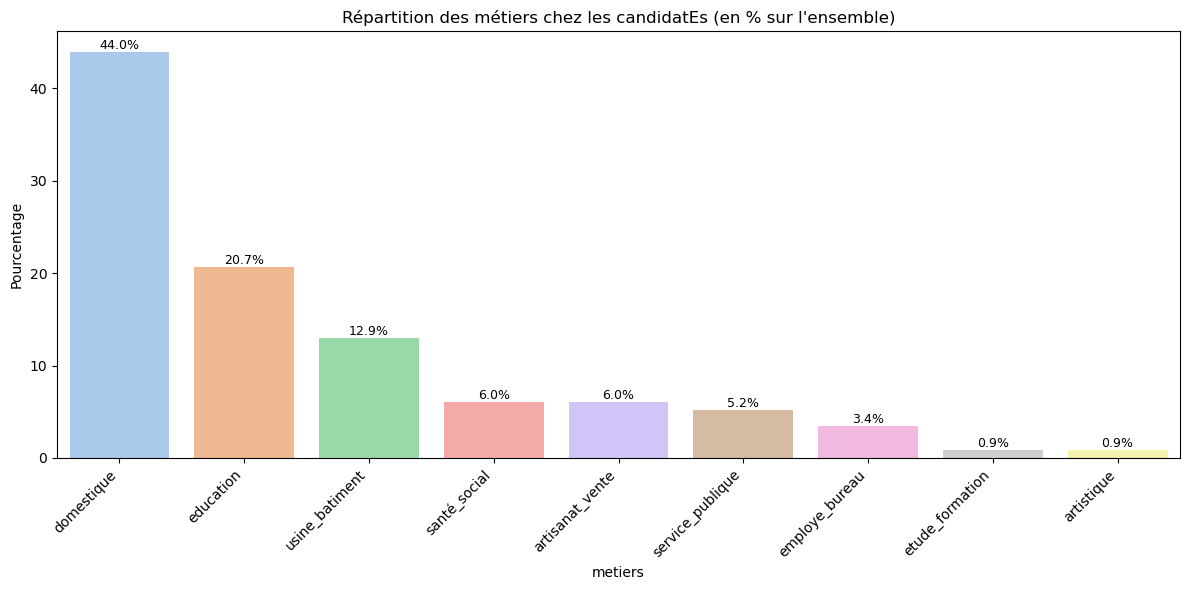

In [7]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df_copy_metiers_elections_F, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers chez les candidatEs (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("metiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metiers_candidatEs_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### métiers chez les candidats

In [8]:
df_metiers_elections_M = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition as metier FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.definition ='legislatif' AND tm.pk_type_M is not null AND pe.genre='M'
group by metier
ORDER BY count_type_metier DESC
""", connection)

total= df_metiers_elections_M['count_type_metier'].sum()

df_metiers_elections_M['pourcentage']= df_metiers_elections_M['count_type_metier']/ total * 100.00

df_metiers_elections_M.head(1000)

,count_type_metier,metier,pourcentage
0,157,usine_batiment,43.013699
1,60,education,16.438356
2,25,service_publique,6.849315
3,25,artisanat_vente,6.849315
4,24,impression_journalisme,6.575342
5,18,employe_bureau,4.931507
6,15,restauration_hotellerie,4.109589
7,12,santé_social,3.287671
8,10,droit_finance,2.739726
9,8,agriculture,2.191781


### Répartition dans un graphe

In [10]:
df_copy_metiers_elections_M = df_metiers_elections_M.drop(columns=['count_type_metier'])

df_copy_metiers_elections_M.head()

df_copy_metiers_elections_M.to_csv('CSV/question_05_metiers_elections.csv')

C:\Users\LZender\AppData\Local\Temp\ipykernel_19480\1179037176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_copy_metiers_elections_M, x='metier', y='pourcentage', palette='pastel')


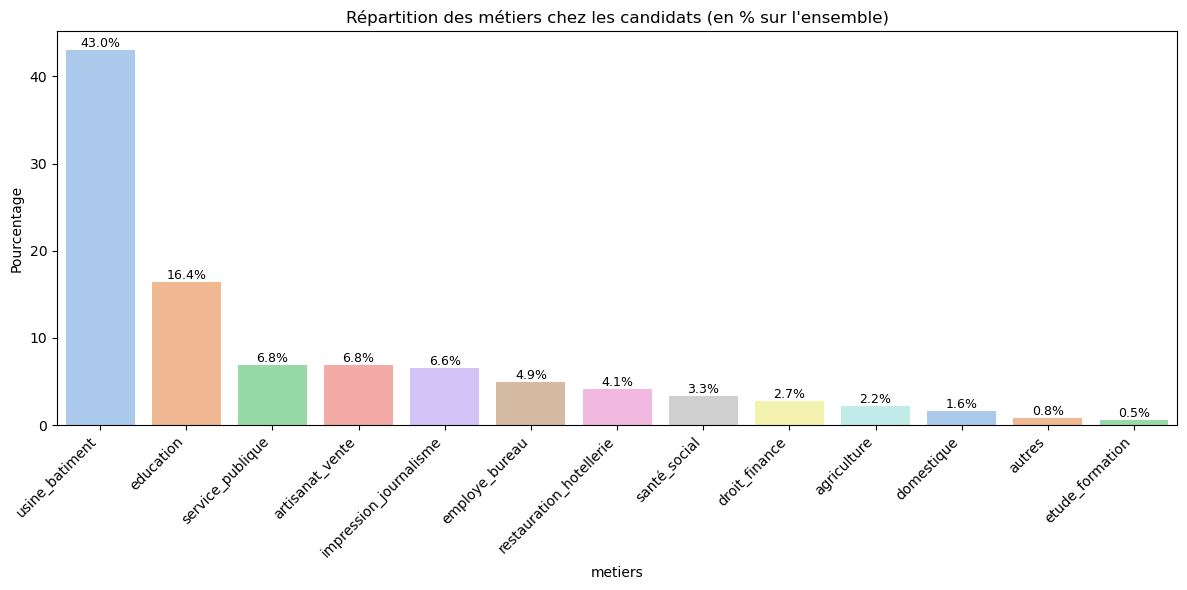

In [12]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df_copy_metiers_elections_M, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers chez les candidats (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("metiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metiers_candidats_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 5.1.1 élections cantonales

In [26]:

df_metiers_parlement = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition as metier FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.nom ='election_parlement' AND tm.pk_type_M is not null AND e.definition ='legislatif'
group by metier
ORDER BY count_type_metier DESC
""", connection)

total= df['count_type_metier'].sum()

df_metiers_parlement['pourcentage']= df_metiers_parlement['count_type_metier']/ total * 100.00

df_metiers_parlement.head(1000)

,count_type_metier,metier,pourcentage
0,86,usine_batiment,35.390947
1,39,education,16.049383
2,28,domestique,11.522634
3,17,service_publique,6.995885
4,13,impression_journalisme,5.349794
5,12,employe_bureau,4.938272
6,12,artisanat_vente,4.938272
7,11,santé_social,4.526749
8,8,restauration_hotellerie,3.292181
9,7,droit_finance,2.880658


le résultat pose problème, il y a des résultats en trop par rapport à la participation aux élections. cette différence peut découler du fait que  les individus ont pour certains plusieurs métiers...
mais le surplus reste négligeable

### répartitions des métiers pour le Parlement dans un graphe

In [27]:
df_copy_metiers_parlement = df_metiers_parlement.drop(columns=['count_type_metier'])

df_copy_metiers_parlement.head()

df_copy_metiers_parlement.to_csv('CSV/question_05_metiers_elections_parlement.csv')

C:\Users\LZender\AppData\Local\Temp\ipykernel_9316\4023502746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_copy_metiers_parlement, x='metier', y='pourcentage', palette='pastel')


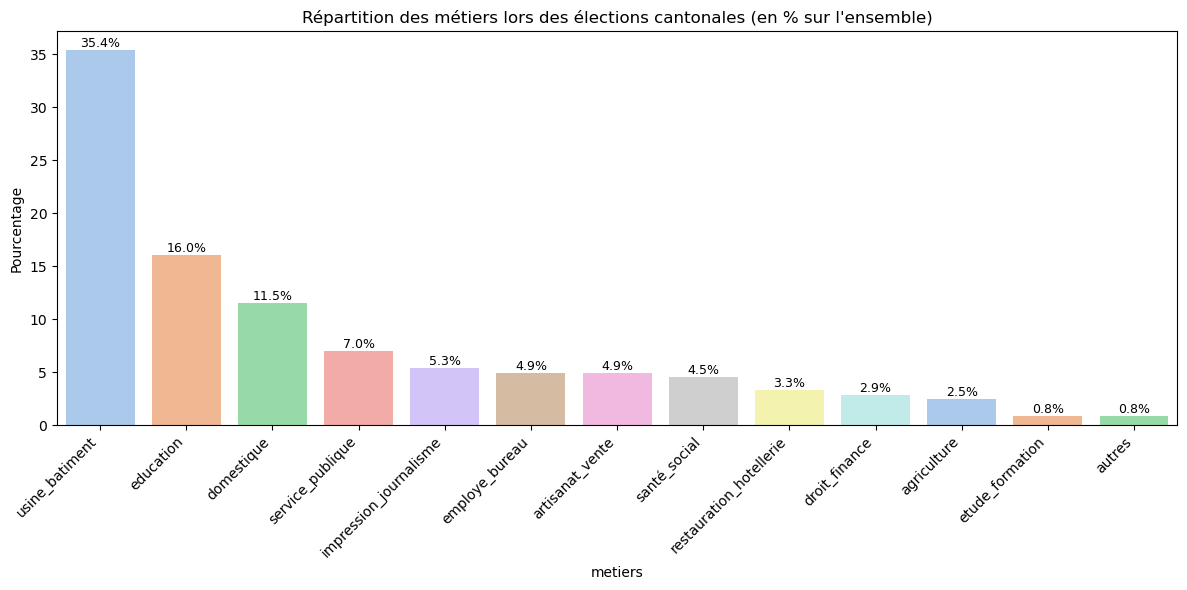

In [29]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df_copy_metiers_parlement, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers lors des élections cantonales (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("metiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metiers_elections_parlement_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 5.1.2 élections communales

In [33]:


df_metiers_CG = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition as metier FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.nom ='election_conseil_general' AND tm.pk_type_M is not null AND e.definition ='legislatif'
group by metier
ORDER BY count_type_metier DESC
""", connection)

total= df_metiers_CG['count_type_metier'].sum()

df_metiers_CG['pourcentage']= df_metiers_CG['count_type_metier']/ total * 100.00

df_metiers_CG.head(1000)

,count_type_metier,metier,pourcentage
0,86,usine_batiment,36.134454
1,45,education,18.907563
2,29,domestique,12.184874
3,20,artisanat_vente,8.403361
4,14,service_publique,5.882353
5,11,impression_journalisme,4.621849
6,10,employe_bureau,4.201681
7,8,santé_social,3.361345
8,7,restauration_hotellerie,2.941176
9,3,droit_finance,1.260504


### répartitions des métiers pour le Conseil général dans un graphe

In [34]:
df_copy_metiers_CG = df_metiers_CG.drop(columns=['count_type_metier'])

df_copy_metiers_CG.head()

df_copy_metiers_CG.to_csv('CSV/question_05_metiers_elections_parlement.csv')

C:\Users\LZender\AppData\Local\Temp\ipykernel_9316\1716103506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_copy_metiers_CG, x='metier', y='pourcentage', palette='pastel')


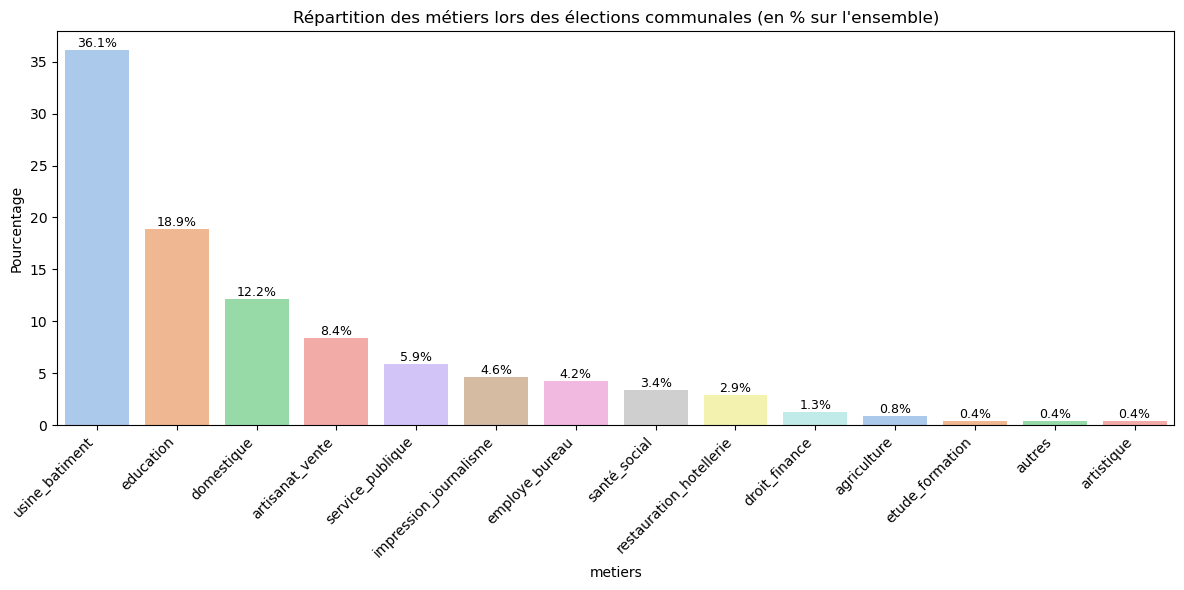

In [36]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df_copy_metiers_CG, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers lors des élections communales (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("metiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metiers_elections_CG_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 5.2 élections avec la participation selon le genre

### 5.2.1 élections cantonales

In [44]:
df_election_cantonal_comparatif = pandas.read_sql("""
SELECT 
COUNT (pk_type_M) as count_type_metier, tm.definition as metier, pe.genre as genre
FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.nom ='election_parlement' AND tm.pk_type_M is not null
group by metier, genre
ORDER BY count_type_metier DESC
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_election_cantonal_comparatif['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_election_cantonal_comparatif['pourcentage'] = df_election_cantonal_comparatif['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_election_cantonal_comparatif = df_election_cantonal_comparatif.reset_index(drop=True)

# Affichage du résultat
print(df_election_cantonal_comparatif[['genre', 'metier', 'count_type_metier', 'pourcentage']])


   genre                   metier  count_type_metier  pourcentage
0      M           usine_batiment                 80    32.921811
1      M                education                 28    11.522634
2      F               domestique                 24     9.876543
3      M         service_publique                 15     6.172840
4      M   impression_journalisme                 13     5.349794
5      F                education                 11     4.526749
6      M          artisanat_vente                 10     4.115226
7      M           employe_bureau                 10     4.115226
8      M  restauration_hotellerie                  8     3.292181
9      M            droit_finance                  7     2.880658
10     M             santé_social                  7     2.880658
11     M              agriculture                  6     2.469136
12     F           usine_batiment                  6     2.469136
13     M               domestique                  4     1.646091
14     F  

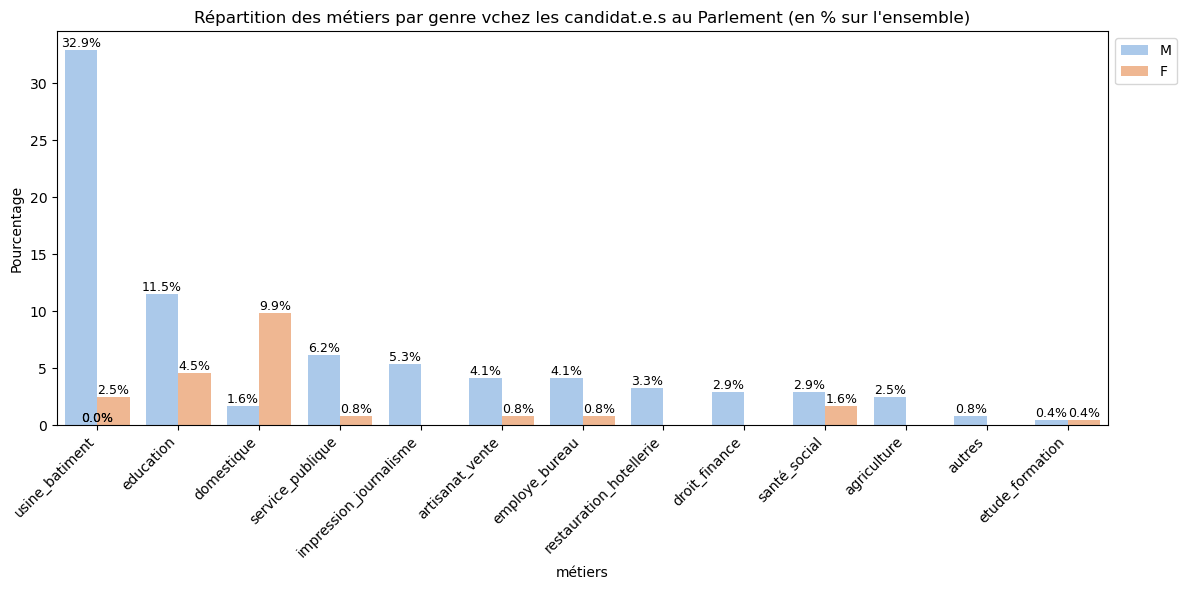

In [46]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_election_cantonal_comparatif, x='metier', y='pourcentage', hue='genre', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers par genre vchez les candidat.e.s au Parlement (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("métiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metier_parlement_genre_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 5.2.2 élections communales

In [47]:
df_election_communale_comparatif = pandas.read_sql("""
SELECT 
COUNT (pk_type_M) as count_type_metier, tm.definition as metier, pe.genre as genre
FROM personne as pe
LEFT JOIN participation as pa ON pa.fk_personne = pe.pk_personne
LEFT JOIN evenement as e ON e.pk_evenement = pa.fk_evenement
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where e.nom ='election_conseil_general' AND tm.pk_type_M is not null
group by metier, genre
ORDER BY count_type_metier DESC
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_election_communale_comparatif['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_election_communale_comparatif['pourcentage'] = df_election_communale_comparatif['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_election_communale_comparatif = df_election_communale_comparatif.reset_index(drop=True)

# Affichage du résultat
print(df_election_communale_comparatif[['genre', 'metier', 'count_type_metier', 'pourcentage']])


   genre                   metier  count_type_metier  pourcentage
0      M           usine_batiment                 77    32.352941
1      M                education                 32    13.445378
2      F               domestique                 27    11.344538
3      M          artisanat_vente                 15     6.302521
4      F                education                 13     5.462185
5      M   impression_journalisme                 11     4.621849
6      M         service_publique                 10     4.201681
7      F           usine_batiment                  9     3.781513
8      M           employe_bureau                  8     3.361345
9      M  restauration_hotellerie                  7     2.941176
10     F          artisanat_vente                  5     2.100840
11     M             santé_social                  5     2.100840
12     F         service_publique                  4     1.680672
13     M            droit_finance                  3     1.260504
14     F  

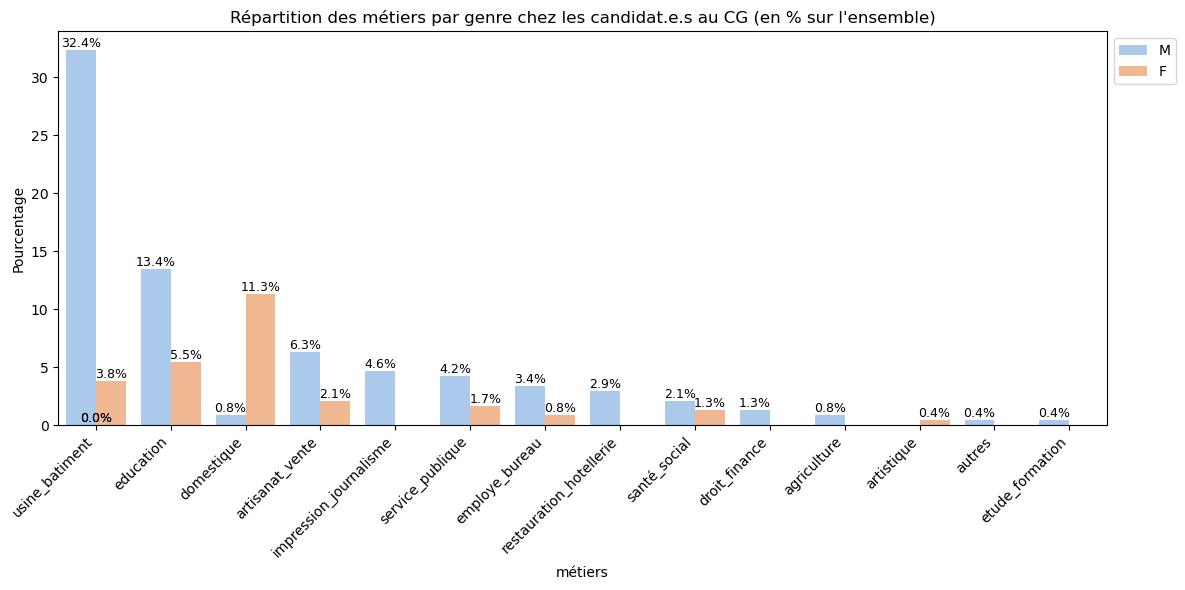

In [52]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_election_communale_comparatif, x='metier', y='pourcentage', hue='genre', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers par genre chez les candidat.e.s au CG (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("métiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_05_metier_CG_genre_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()